Take Home Exercise
This is a take home exercise. All the data were in Jason format

# Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

There are several ways to do the project. What I will do is to create a time series with 1 min interval with no observation (observation=0), then append the login with observation=1. Resample it with 15 min or directly use histgram to show with 15 min interval.

The project will divided in several steps:
1. extract data from Jason
2. Assigan the data to a dataframe and changed to timeseries
3. Add obsservation column =1

In [1]:
#The first step of this project is to read the Jason File

import json

with open(r'C:\\Users\\mohua\\OneDrive\\Documents\\Take home challenge\\ultimate_challenge\\logins.json') as f:
  data = json.load(f)

print(data)

{'login_time': ['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37', '1970-01-01 20:16:36', '1970-01-01 20:26:21', '1970-01-01 20:21:41', '1970-01-01 20:12:16', '1970-01-01 20:35:47', '1970-01-01 20:35:38', '1970-01-01 20:47:52', '1970-01-01 20:26:05', '1970-01-01 20:31:03', '1970-01-01 20:34:46', '1970-01-01 20:36:34', '1970-01-01 20:39:25', '1970-01-01 20:40:37', '1970-01-01 20:34:58', '1970-01-01 20:43:59', '1970-01-01 20:47:46', '1970-01-01 20:46:34', '1970-01-01 20:56:07', '1970-01-01 20:49:12', '1970-01-01 20:59:06', '1970-01-01 20:59:59', '1970-01-01 21:15:01', '1970-01-01 21:09:24', '1970-01-01 21:19:24', '1970-01-01 21:20:53', '1970-01-01 21:29:19', '1970-01-01 21:58:05', '1970-01-01 21:51:51', '1970-01-01 21:59:40', '1970-01-01 22:08:34', '1970-01-01 22:02:51', '1970-01-01 21:58:32', '1970-01-01 22:02:31', '1970-01-01 22:05:32', '1970-01-01 22:02:46', '1970-01-01 22:10:28', '1970-01-01 22:11:58', '1970-01-01 22:01:05', '1970-01-01 22:19:10', '1970-01-01 22:16:

Data looks good. The next step is to setup the data to the dataframe and run the process

In [2]:
# Check the dataframe
import pandas as pd
import numpy as np

df=pd.DataFrame.from_dict(data)
print(df.head())
print(df.shape)
print(df.info())
print(df.isnull().sum())
# df is a string, need change to time series and count for time difference

            login_time
0  1970-01-01 20:13:18
1  1970-01-01 20:16:10
2  1970-01-01 20:16:37
3  1970-01-01 20:16:36
4  1970-01-01 20:26:21
(93142, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB
None
login_time    0
dtype: int64


In [3]:
# Add observation=1
df['login_time']= pd.to_datetime(df['login_time']) 
print(df.info())
df['observation']=1
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None
           login_time  observation
0 1970-01-01 20:13:18            1
1 1970-01-01 20:16:10            1
2 1970-01-01 20:16:37            1
3 1970-01-01 20:16:36            1
4 1970-01-01 20:26:21            1


In [4]:
# create a time seriese with observation
date_rang = pd.date_range(start='1969-12-29 20:10:00', end='1970-04-13 18:55:00', freq='T')
df_time=pd.DataFrame(date_rang, columns=['login_time'])
df_time['observation']=0
df_time.head()

,login_time,observation
0,1969-12-29 20:10:00,0
1,1969-12-29 20:11:00,0
2,1969-12-29 20:12:00,0
3,1969-12-29 20:13:00,0
4,1969-12-29 20:14:00,0


In [5]:
# Append the df_time to df
df_final=df_time.append(df)
df_final=df_final.set_index(['login_time'])
df_final=df_final.sort_index()
df_final.head(40)

,observation
login_time,
1969-12-29 20:10:00,0
1969-12-29 20:11:00,0
1969-12-29 20:12:00,0
1969-12-29 20:13:00,0
1969-12-29 20:14:00,0
1969-12-29 20:15:00,0
1969-12-29 20:16:00,0
1969-12-29 20:17:00,0
1969-12-29 20:18:00,0


In [6]:
# check how many days 
days=df['login_time'].max()-df['login_time'].min()
print(days)
# the total time = 101 x24 x60 +22x60+46= 159766 minutes
# if at 15 mintues interval, there should be 11412 bins

101 days 22:45:22


In [7]:
# create a weekly interval data
df_interval_week=df_final.resample('W').sum()
print(df_interval_week.head())
df_interval_week_sorted=df_interval_week.sort_values(by=['observation'],ascending=False)
print(df_interval_week_sorted.head(20))

            observation
login_time             
1970-01-04         2374
1970-01-11         5217
1970-01-18         5023
1970-01-25         4751
1970-02-01         4744
            observation
login_time             
1970-03-22         8955
1970-04-05         8095
1970-03-08         7398
1970-03-15         7338
1970-03-29         7285
1970-02-22         7035
1970-03-01         6554
1970-04-12         6491
1970-02-15         5915
1970-02-08         5572
1970-01-11         5217
1970-01-18         5023
1970-01-25         4751
1970-02-01         4744
1970-01-04         2374
1970-04-19          395


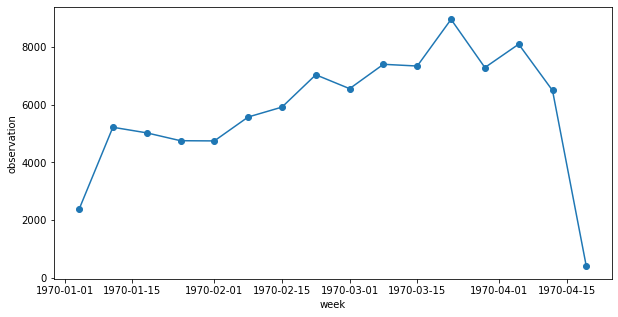

In [8]:
#plot weekly data
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.plot(df_interval_week.index,df_interval_week['observation'],'-o')
plt.xlabel('week')
plt.ylabel('observation')
plt.show()

There 16 weeks for the data. The results showed that the login_observation increased as the weekly pass. the highgest will be the Marth and April.

In [9]:
# create an interval by days
df_interval_days=df_final.resample('D').sum()
print(df_interval_days.head())
print(df_interval_days.info())
df_interval_days_sorted=df_interval_days.sort_values(by=['observation'],ascending=False)
print(df_interval_days_sorted.head(20))

            observation
login_time             
1969-12-29            0
1969-12-30            0
1969-12-31            0
1970-01-01          112
1970-01-02          681
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 1969-12-29 to 1970-04-13
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   observation  106 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB
None
            observation
login_time             
1970-04-04         1889
1970-03-14         1706
1970-03-07         1666
1970-03-15         1565
1970-03-29         1523
1970-04-03         1504
1970-03-28         1488
1970-03-21         1485
1970-02-21         1479
1970-03-22         1472
1970-03-19         1444
1970-03-08         1434
1970-02-22         1430
1970-04-12         1409
1970-02-28         1395
1970-04-11         1352
1970-03-17         1290
1970-03-01         1273
1970-02-08         1262
1970-03-20         1215


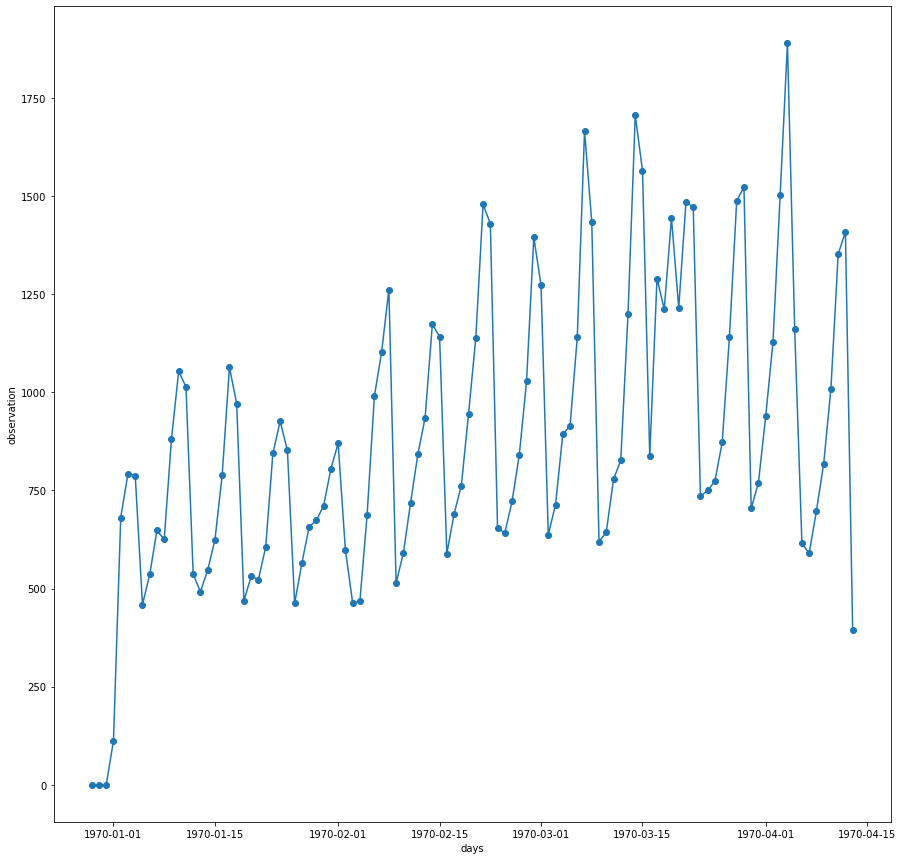

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
plt.plot(df_interval_days.index,df_interval_days['observation'],'-o')
plt.xlabel("days")
plt.ylabel('observation')
plt.show()

Daily data showed a strong pattern in a 7-days role. Further observation showed that more observations during the weekend. The 1970-01-01 was Thursday

In [11]:
# create a 15 min interval data
df_interval_15min=df_final.resample('15T').sum()
df_interval_15min.head()

,observation
login_time,
1969-12-29 20:00:00,0
1969-12-29 20:15:00,0
1969-12-29 20:30:00,0
1969-12-29 20:45:00,0
1969-12-29 21:00:00,0


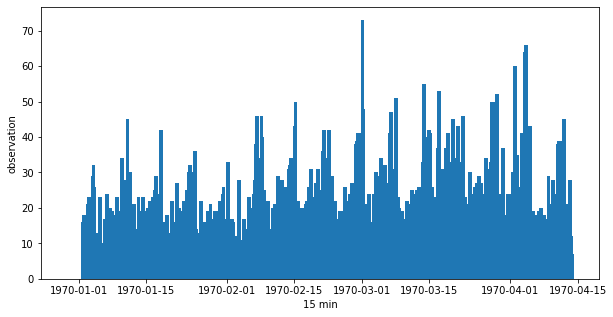

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.bar(df_interval_15min.index,df_interval_15min['observation'])
plt.xlabel('15 min')
plt.ylabel('observation')
plt.show()

The 15 min results showed the differences in the observation. Therefore we will conunt the observations above 15 and see what are the time there.

In [13]:
df_observation_above15= df_interval_15min[df_interval_15min['observation']>15]
df_observation_above15_sorted=df_observation_above15.sort_values(by='observation',ascending=False)
print(df_observation_above15_sorted.head(20))
print(df_observation_above15.shape)

                     observation
login_time                      
1970-03-01 04:30:00           73
1970-04-04 05:30:00           66
1970-04-04 01:30:00           64
1970-04-04 01:15:00           63
1970-04-01 23:30:00           60
1970-04-04 05:00:00           60
1970-04-04 05:15:00           59
1970-04-04 04:45:00           59
1970-04-04 01:45:00           56
1970-03-13 22:15:00           55
1970-04-04 01:00:00           54
1970-03-17 01:30:00           53
1970-04-04 00:30:00           53
1970-03-29 04:45:00           52
1970-03-08 04:45:00           51
1970-04-03 22:45:00           50
1970-03-28 04:30:00           50
1970-03-29 02:15:00           50
1970-02-15 04:45:00           50
1970-04-04 00:45:00           50
(1847, 1)


In [14]:
df_observation_hour=df_observation_above15.resample('6H').sum()
df_observation_hour.head(50)
df_observation_hour.shape
df_observation_hour_1=df_observation_hour[df_observation_hour['observation']!=0]
df_observation_hour_1.sort_values(by='observation',ascending=False)

,observation
login_time,
1970-04-04 00:00:00,1094
1970-03-29 00:00:00,790
1970-04-12 00:00:00,738
1970-03-22 00:00:00,700
1970-03-08 00:00:00,692
...,...
1970-01-21 00:00:00,16
1970-01-30 18:00:00,16
1970-01-28 00:00:00,16


Most observations seems to happen during the night

# Conclusion
The analysis showed that :
1. Based on the 15-min data and aggregate by hour, most observation happens during the night
2. Based on the daily data, there is a pattern of the observation. The Friday and weekend showed the most observation, maybe because people does work
3. The weekly data showed that March and Apr has more observations.

# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
An evenly distributed driver partner in two cities will help to balance the traffic issues between two cities. If the driver partner is exclusive in one of the city, the driver will not be balance
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
The proposed experiment will be the average time travel between these two cities at current time. The features affect the travel time. The 'idea' time travel between two cities with driver partner present in two cities. People will find drivering partner without any issue. 

b. what statistical test(s) you will conduct to verify the significance of the observation
We will use model to fit data, then use the feature of importance, cross-validation and confusion map to test

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
Depend on the model, if we DO see the change, we will recommend to the city operation through a powerpoint presentation and a documentations

# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm
rider retention (again, a few sentences will suffice).
Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYY MM DD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [15]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

The first step is to read the data

In [16]:
with open(r'C:\\Users\\mohua\\OneDrive\\Documents\\Take home challenge\\ultimate_challenge\\ultimate_data_challenge.json') as file:
  data = json.load(file)

df_ultimate=pd.DataFrame.from_dict(data)
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
#check the data information
print(df_ultimate.shape)
print(df_ultimate.info())
print(df_ultimate.city.unique())
print(df_ultimate.phone.unique())

(50000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None
["King's Landing" 'Astapor' 'Winterfell']
['iPhone' 'Android'

1. Data type: 
   Str: city, signup_date,last_trip_date, phone
   float: avg_rating_of_driver,avg_surge ,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
   int64: trips_in_first_30_days
   bool:  ultimate_black_user
2. There are three cities "King's Landing" 'Astapor' 'Winterfell'
3. There are three sets of phones 'iPhone' 'Android' 'None'

In [18]:
# check with null
print(df_ultimate.isnull().sum())
print(df_ultimate.avg_rating_of_driver.unique())
print(df_ultimate.avg_rating_by_driver.unique())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64
[4.7 5.  4.3 4.6 4.4 3.5 nan 4.5 4.  3.9 4.9 4.8 2.5 3.7 1.  4.1 4.2 3.
 3.8 2.  2.7 3.3 2.8 3.6 3.4 3.2 2.6 3.1 2.9 1.7 1.8 1.5 2.3 1.9 2.1 2.4
 1.6 2.2]
[5.  4.9 4.  3.  4.8 4.7 4.5 4.2 nan 4.4 4.6 3.7 4.3 3.5 2.  3.8 2.5 4.1
 3.9 1.  3.3 3.4 3.6 3.2 2.3 2.8 1.5 2.7]


Since there are null in avg_rating_of_driver,avg_rating_by_driver,and phone, we will need to fill in these data first. We assume that the missing value for avg_rating_of_driver and avg_rating_by_driver will be there mean. The missing value for phone will be android. 

In [19]:
df_ultimate.phone.replace(to_replace=[None], value='Android', inplace=True)
df_ultimate.avg_rating_of_driver=df_ultimate.avg_rating_of_driver.fillna(np.mean(df_ultimate['avg_rating_of_driver']))
df_ultimate.avg_rating_by_driver=df_ultimate.avg_rating_by_driver.fillna(np.mean(df_ultimate['avg_rating_by_driver']))
print(df_ultimate.phone.unique())
print(df_ultimate.avg_rating_of_driver.unique())
print(df_ultimate.avg_rating_by_driver.unique())
print(df_ultimate.info())

['iPhone' 'Android']
[4.7        5.         4.3        4.6        4.4        3.5
 4.60155929 4.5        4.         3.9        4.9        4.8
 2.5        3.7        1.         4.1        4.2        3.
 3.8        2.         2.7        3.3        2.8        3.6
 3.4        3.2        2.6        3.1        2.9        1.7
 1.8        1.5        2.3        1.9        2.1        2.4
 1.6        2.2       ]
[5.        4.9       4.        3.        4.8       4.7       4.5
 4.2       4.7781582 4.4       4.6       3.7       4.3       3.5
 2.        3.8       2.5       4.1       3.9       1.        3.3
 3.4       3.6       3.2       2.3       2.8       1.5       2.7      ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   sig

In [20]:
# Check the time length of the sigup date vs. last trip date
df_data=df_ultimate
df_data['signup_date']=pd.to_datetime(df_data['signup_date'])
df_data['last_trip_date']=pd.to_datetime(df_data['last_trip_date'])
df_data['time_length']=df_data['last_trip_date']-df_data['signup_date']
df_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days


Based on the requirement, the retained customer are active in the preceeding 30 days. But what is this mean?  30 days before the last trip? or 30 days after the trip? or signup time>30 days and have at least one activities?  First need to sort data and see the max or minimum length for the signing date.

In [21]:
df_data_1=df_data
df_data_2=df_data_1.sort_values(by='time_length')
df_data_3=df_data_1.sort_values(by='time_length',ascending=False)
print('The minium time length between the last trip vs. signup data is', df_data_2['time_length'].min())
print('The maximum time length between the last trip vs. signup data is', df_data_3['time_length'].max())

The minium time length between the last trip vs. signup data is 0 days 00:00:00
The maximum time length between the last trip vs. signup data is 181 days 00:00:00


In [22]:
#set the cutoff date of retaining
from datetime import date, timedelta

df_data['cutoff_date']=df_data['last_trip_date']-timedelta(days=30)
df_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length,cutoff_date
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,2014-05-18
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,2014-04-05
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,2013-12-08
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,2014-05-30
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,2014-02-13


Feature Comparison

In [23]:
# City
df_city_Astapor=df_data[df_data['city']=='Astapor']
df_city_Winterfell=df_data[df_data['city']=='Winterfell']
df_city_kings_landing=df_data[df_data['city']=="King's Landing"]
df_city_summary={"Astapor":len(df_city_Astapor),"Winterfell":len(df_city_Winterfell),"King's Landing":len(df_city_kings_landing)}
print('People travel to Astapor # =', len(df_city_Astapor))
print('People travel to Winterfell # =', len(df_city_Winterfell))
print("People travel to King's Landing # =", len(df_city_kings_landing))

People travel to Astapor # = 16534
People travel to Winterfell # = 23336
People travel to King's Landing # = 10130


In [ ]:
# phone
df_iphone=df_data[df_data['phone']=='iPhone']
df_Android=df_data[df_data['phone']=='Android']
print('People use iphone # =', len(df_iphone))
print('People use Android # =', len(df_Android))

# Predicting Model Setup for 6 months ~ 181 days

In [24]:
# extract data for 181
df_6_months=df_data[df_data['time_length']=='181 days']
df_6_months.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length,cutoff_date
1636,Winterfell,2,2014-01-01,5.0,1.09,2014-07-01,Android,7.1,False,71.4,3.14,4.7,181 days,2014-06-01
5706,Winterfell,2,2014-01-01,4.4,1.00,2014-07-01,iPhone,0.0,False,66.7,3.54,4.5,181 days,2014-06-01
8266,King's Landing,2,2014-01-01,4.9,1.12,2014-07-01,iPhone,15.8,False,57.9,2.84,4.9,181 days,2014-06-01
18102,Astapor,2,2014-01-01,5.0,1.00,2014-07-01,iPhone,0.0,False,100.0,4.57,5.0,181 days,2014-06-01
18679,King's Landing,2,2014-01-01,4.6,1.03,2014-07-01,iPhone,7.7,False,69.2,3.94,4.8,181 days,2014-06-01


In [25]:
# Basic statistical
df_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,time_length
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,92 days 18:57:44.640000
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753,62 days 03:06:56.580842
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0 days 00:00:00
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000,27 days 00:00:00
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000,110 days 00:00:00
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,150 days 00:00:00
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,181 days 00:00:00


In [26]:
# Check the signup data
print('The signup date period is from ', df_data.signup_date.min(), ' to ',df_data.signup_date.max())

The signup date period is from  2014-01-01 00:00:00  to  2014-01-31 00:00:00


In [27]:
# Check the last trip date
print('The last trip date varied from ',df_data.last_trip_date.min(), ' to ', df_data.last_trip_date.max())

The last trip date varied from  2014-01-01 00:00:00  to  2014-07-01 00:00:00


In [28]:
# establish the retention data, which should have active after 181 days - 30 days = 150 days after signup. This should be the output of the training model
df_data['retention']=0
df_data.retention[df_data['time_length']>'150 days']=1
df_data.head()

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length,cutoff_date,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,2014-05-18,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,2014-04-05,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,2013-12-08,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,2014-05-30,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,2014-02-13,0


We will try to eliminate some parameters for the perdiction model
1. City: We found that the distribution of people to three cities were different. So we should keep this parameter
2. Signup_data: Use histogram to check the distribution of signup people vs. date. The result did not seems to be an important factor. The people were seems to be evenly distributed 
3. Phone: There is a significant difference of the phone. So we will keep this parameter

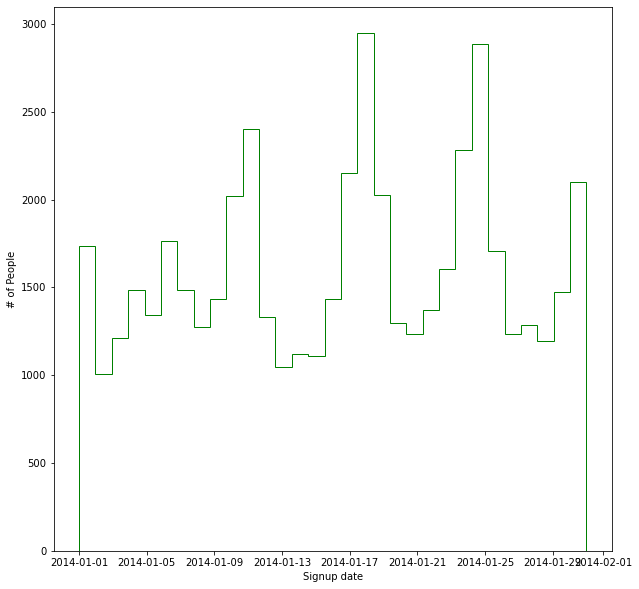

In [29]:
# Check signup data with 1 day, 3 days and 6 days average.
df_signup_date=df_data.signup_date
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
plt.hist(df_signup_date, bins=31,histtype='step',color='green')
plt.xlabel('Signup date')
plt.ylabel('# of People')
plt.show()

# To keep the original data, we will transfer the data to the df_ training and setup model based on the data_train
y= retention column
x= city, trips_in_first_30_days, avg_rating_of_driver, avg_surge, phone, surge_pct, ultimate_black_user, weekday_pct, avg_dist, avg_rating_by_driver
The signup_date shoudl be a randomly action, the last_trip_date

In [30]:
df_training=df_data
df_training.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length,cutoff_date,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,2014-05-18,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,2014-04-05,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,2013-12-08,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,2014-05-30,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,2014-02-13,0


In [31]:
# Although we can create dummies for cities, phone and ultimate_black_user, 
# to facilitate the simulation, we will convert it to numberic value
df_training['whether_ultimate_black_user']=0
df_training.whether_ultimate_black_user[df_training['ultimate_black_user']==True]=1
df_training.head()

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length,cutoff_date,retention,whether_ultimate_black_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,2014-05-18,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,2014-04-05,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,2013-12-08,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,2014-05-30,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,2014-02-13,0,0


In [32]:
# convert time_length from time series to int64
df_training['time_length_days'] = df_training['time_length'].dt.days.astype('int64')
df_training.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length,cutoff_date,retention,whether_ultimate_black_user,time_length_days
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,2014-05-18,0,1,143
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,2014-04-05,0,0,96
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,2013-12-08,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,2014-05-30,1,1,170
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,2014-02-13,0,0,47


In [33]:
# change phone type: iphone=0, Android=1
df_training['iPhone_or_Android']=0
df_training.iPhone_or_Android[df_training['phone']=='Android']=1
df_training.head()

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length,cutoff_date,retention,whether_ultimate_black_user,time_length_days,iPhone_or_Android
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,2014-05-18,0,1,143,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,2014-04-05,0,0,96,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,2013-12-08,0,0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,2014-05-30,1,1,170,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,2014-02-13,0,0,47,1


In [34]:
# Define the city: King's Landing=0, Astapor=1, Winterfell=2
df_training["King's Landing_or_Astapor_or_ Winterfell"]=0
df_training["King's Landing_or_Astapor_or_ Winterfell"][df_training["city"]=="Astapor"]=1
df_training["King's Landing_or_Astapor_or_ Winterfell"][df_training["city"]=="Winterfell"]=2
df_training.head()

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length,cutoff_date,retention,whether_ultimate_black_user,time_length_days,iPhone_or_Android,King's Landing_or_Astapor_or_ Winterfell
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,2014-05-18,0,1,143,0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,2014-04-05,0,0,96,1,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,2013-12-08,0,0,1,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,2014-05-30,1,1,170,0,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,2014-02-13,0,0,47,1,2


In [35]:
# drop the column
df_training_1=df_training.drop(['signup_date', 'last_trip_date','cutoff_date','ultimate_black_user','time_length','phone','city'], axis=1)
df_training_1.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retention,whether_ultimate_black_user,time_length_days,iPhone_or_Android,King's Landing_or_Astapor_or_ Winterfell
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,143,0,0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,96,1,1
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0,1
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,170,0,0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,47,1,2


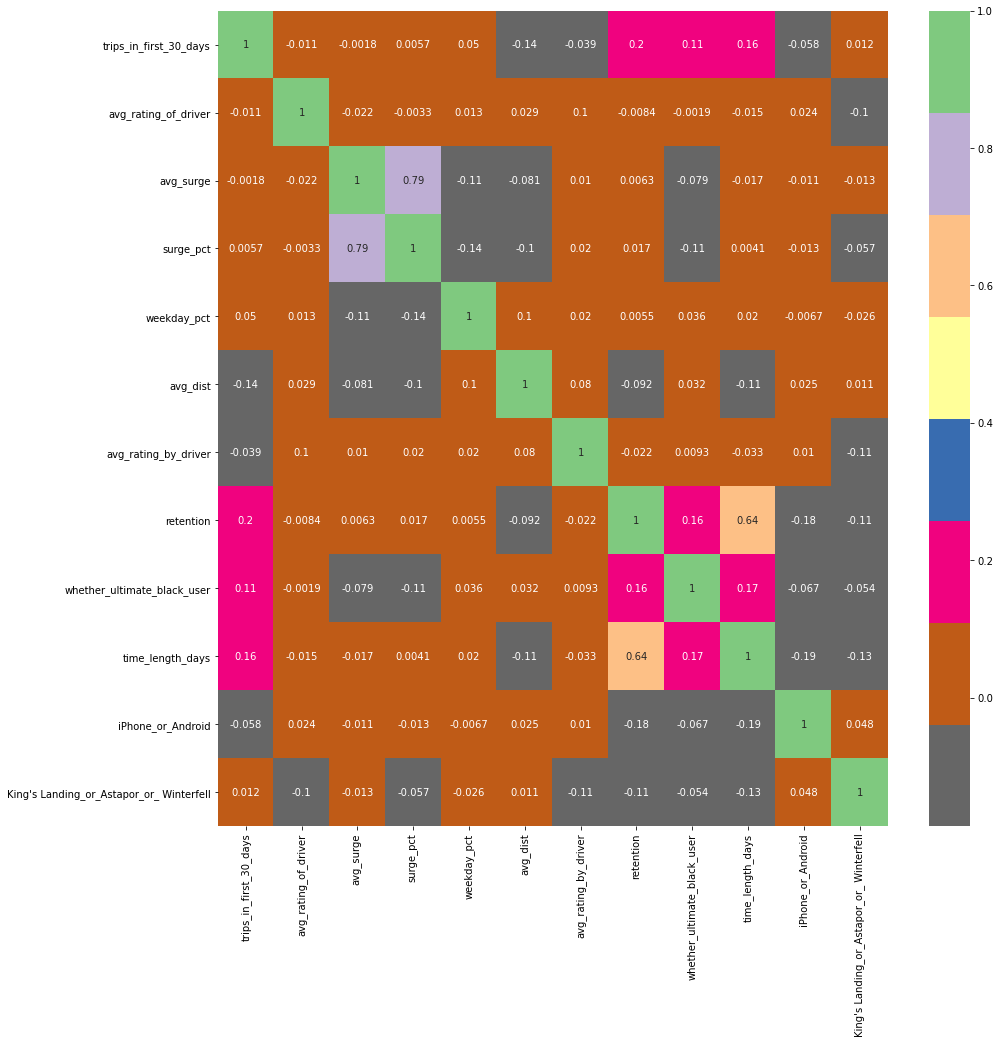

In [36]:
# Check the heatmap with different features
import seaborn as sns

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.heatmap(df_training_1.corr(),cmap='Accent_r',annot=True,ax=ax)


The heatmap showed that the retention has 
 - positive relationship with trips_in_first_30_days, surge_pct, whether_ultimate_black_user, time_length_days
 - negative relationship with avg_dist, avg_rating_by_driver, iPhone_or_Android, King's Landing_or_Astapor_or_ Winterfell
 - small relationship with avg_rating_of_driver, avg_surge, weekly_pct,

In [37]:
df_retention=df_training_1[df_training_1.retention==1]
len(df_retention)

12198

There are 12198 people are active. The next step is to setup the training model. We will train the model with features and use rentention as output. We will see how many data were above 181 days. We will use these days to test the model

In [38]:
df_retention_6_months=df_training_1[df_training_1.time_length_days>180]
print('There are ', len(df_retention_6_months),' people more than 6 months')
df_retention_6_months.head(len(df_retention_6_months))

There are  13  people more than 6 months


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retention,whether_ultimate_black_user,time_length_days,iPhone_or_Android,King's Landing_or_Astapor_or_ Winterfell
1636,2,5.000000,1.09,7.1,71.4,3.14,4.7,1,0,181,1,2
5706,2,4.400000,1.00,0.0,66.7,3.54,4.5,1,0,181,0,2
8266,2,4.900000,1.12,15.8,57.9,2.84,4.9,1,0,181,0,0
18102,2,5.000000,1.00,0.0,100.0,4.57,5.0,1,0,181,0,1
18679,2,4.600000,1.03,7.7,69.2,3.94,4.8,1,0,181,0,0
21945,0,4.500000,1.06,9.1,77.3,4.10,4.9,1,0,181,1,2
23214,1,4.601559,1.00,0.0,50.0,4.05,4.7,1,0,181,0,2
25443,0,5.000000,1.00,0.0,20.0,2.02,5.0,1,0,181,0,0
33488,54,4.900000,1.05,6.8,70.7,2.91,4.9,1,1,181,0,0
34464,1,4.700000,1.13,33.3,38.1,3.00,4.7,1,0,181,0,0


We will use these data to test the prediction of model. We first need to drop rows in the training data. But to be safe, we need to create another dataframe df_training_2

In [39]:
# setup dataframe for training
df_training_2=df_training_1[df_training_1.time_length_days<181]

X=df_training_2.drop(['retention'],axis=1)

y=df_training_2['retention']

In [40]:
# Split training / test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


In [42]:
X_predict=df_retention_6_months.drop(['retention'],axis=1)
y_predict=df_retention_6_months['retention']

In [43]:
y_pred_cal = model_res.predict(X_predict)
y_pred_prob = model_res.predict_proba(X_predict)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_predict, y_pred_cal)

f1 = f1_score(y_predict, y_pred_cal, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


11


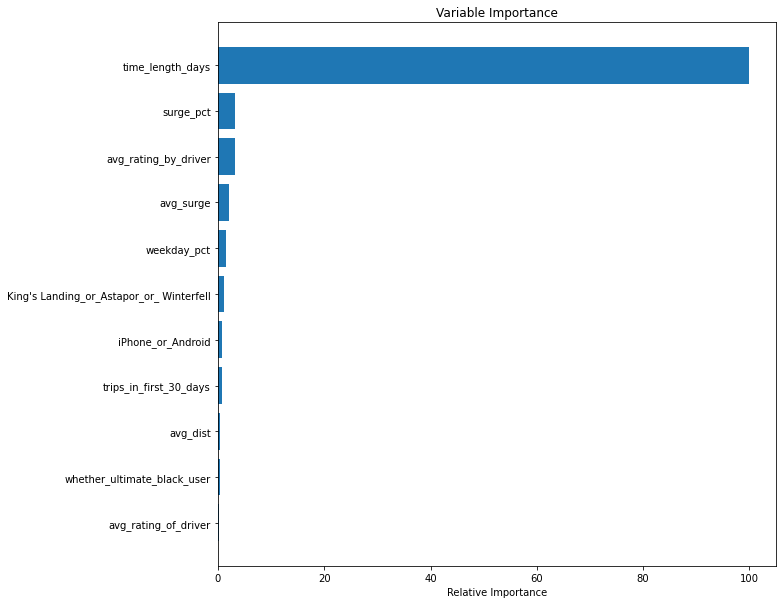

In [44]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The model showed very good fit because it related to the difference between the last day to call the taxi and signup date

Removing the day and time lower the sensitity of the model.

In [45]:
# setup dataframe for training by removing length of time,avg_rating_of_driver, avg_surge, weekday_pct,
df_training_3=df_training_1[df_training_1.time_length_days<181]

X=df_training_3.drop(['retention','time_length_days'],axis=1)
y=df_training_3['retention']

In [46]:
# Split training / test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [47]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

C:\Users\mohua\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.777
Random Forest: f1-score=0.769


In [49]:
X_predict=df_retention_6_months.drop(['retention','time_length_days'],axis=1)
y_predict=df_retention_6_months['retention']

In [50]:
X_predict_scaled=scaler.transform(X_predict)

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [51]:
y_pred_cal = model_res.predict(X_predict_scaled)
y_pred_prob = model_res.predict_proba(X_predict_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_predict, y_pred_cal)

f1 = f1_score(y_predict, y_pred_cal, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.615
Random Forest: f1-score=0.762


C:\Users\mohua\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


10


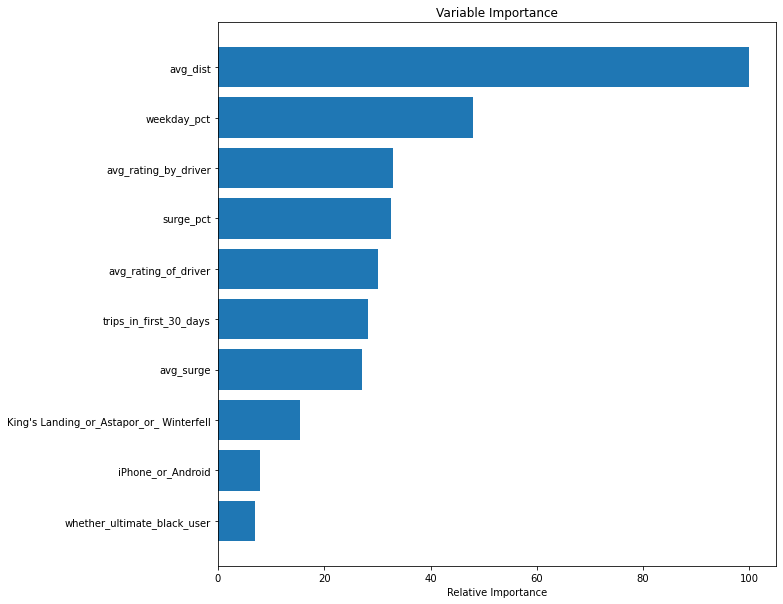

In [52]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The model did not show a good correlationship.  

# Results seems to have a random distribution of the people

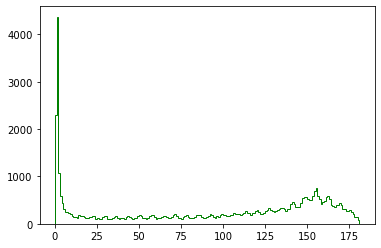

In [53]:
# look at distribution
plt.hist(df_training_1.time_length_days,bins=181,histtype='step',color='green')
plt.show()

In [54]:
df_training.sort_values(by='time_length_days')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_length,cutoff_date,retention,whether_ultimate_black_user,time_length_days,iPhone_or_Android,King's Landing_or_Astapor_or_ Winterfell
37771,Winterfell,4,2014-01-10,3.000000,1.13,2014-01-10,iPhone,25.0,False,100.0,0.74,5.0,0 days,2013-12-11,0,0,0,0,2
5002,Winterfell,2,2014-01-31,5.000000,1.00,2014-01-31,iPhone,0.0,False,100.0,3.07,5.0,0 days,2014-01-01,0,0,0,0,2
5004,Winterfell,1,2014-01-08,5.000000,1.00,2014-01-08,Android,0.0,False,100.0,1.66,5.0,0 days,2013-12-09,0,0,0,1,2
36099,Astapor,1,2014-01-25,4.000000,1.00,2014-01-25,Android,0.0,True,0.0,2.40,5.0,0 days,2013-12-26,0,1,0,1,1
21191,Winterfell,2,2014-01-12,5.000000,1.00,2014-01-12,iPhone,0.0,True,0.0,5.72,2.5,0 days,2013-12-13,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34464,King's Landing,1,2014-01-01,4.700000,1.13,2014-07-01,iPhone,33.3,False,38.1,3.00,4.7,181 days,2014-06-01,1,0,181,0,0
39207,Winterfell,0,2014-01-01,4.200000,1.00,2014-07-01,iPhone,0.0,False,52.6,5.76,4.5,181 days,2014-06-01,1,0,181,0,2
34959,Winterfell,0,2014-01-01,4.800000,1.17,2014-07-01,iPhone,33.3,False,66.7,2.27,5.0,181 days,2014-06-01,1,0,181,0,2
23214,Winterfell,1,2014-01-01,4.601559,1.00,2014-07-01,iPhone,0.0,False,50.0,4.05,4.7,181 days,2014-06-01,1,0,181,0,2


The basic model showed a better than random result. Based on the inforamtion from Mukesh, we will try dummyclssifier

In [55]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
model_dummy=dummy_clf.fit(X_train_scaled, y_train)
DummyClassifier(strategy='most_frequent')
y_pred=model_dummy.predict(X_test_scaled)

lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Dummy Classifier: Accuracy=%.3f' % (ac))

print('Dummy Classifier: f1-score=%.3f' % (f1))

Dummy Classifier: Accuracy=0.760
Dummy Classifier: f1-score=0.657


C:\Users\mohua\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
X_predict=df_retention_6_months.drop(['retention','time_length_days'],axis=1)
y_predict=df_retention_6_months['retention']
X_predict_scaled=scaler.transform(X_predict)

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
y_pred_cal = model_dummy.predict(X_predict_scaled)
y_pred_prob = model_dummy.predict_proba(X_predict_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_predict, y_pred_cal)

print(y_pred_cal)

f1 = f1_score(y_predict, y_pred_cal, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Dummy Classifier: Accuracy=%.3f' % (ac))

print('Dummy Clasifier: f1-score=%.3f' % (f1))

[0 0 0 0 0 0 0 0 0 0 0 0 0]
Dummy Classifier: Accuracy=0.000
Dummy Clasifier: f1-score=0.000


C:\Users\mohua\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mohua\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Dummy classifier also did not show a good result.

# The preliminary results showed that the most importance feature to retain people is based on the distance they would like to travel.